In [1]:
import sklearn 
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml01cw2_helpers import *
# from iaml01cw2_my_helpers import *

D:\Programme_D\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [6]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("C:/Users/larsw/ml/iaml-labs/Coursework 2/data")
Xtrn_orig = np.copy(Xtrn)
Xtst_orig = np.copy(Xtst)

Xtrn = Xtrn / 255.0
Xtst = Xtst / 255.0

Xmean = np.mean(Xtrn, axis=0)
Xmean.shape

Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [8]:
for i in [0,-1]:
    print(i, "\t", Xtrn_nm[i,0:4])

0 	 [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
-1 	 [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


In [119]:
grid = np.zeros((10, 5, 784))
sample_nums = np.zeros((10, 5), "uint32")

for label in range(10):
    samples_of_class = np.array([Xtrn[i,:] for i in range(len(Xtrn_nm)) if Ytrn[i] == label])
    indices_of_class = np.array([i for i in range(len(Xtrn_nm)) if Ytrn[i] == label])

    class_mean = np.mean(samples_of_class, axis=0)
    
    distances_to_mean = np.array([np.linalg.norm(x - class_mean) for x in samples_of_class])

    ab_unsorted = np.argpartition(distances_to_mean, 2)[:2]
    ab = ab_unsorted[np.argsort(distances_to_mean[ab_unsorted])]

    yz_unsorted = np.argpartition(-distances_to_mean, 2)[:2]
    yz = yz_unsorted[np.argsort(distances_to_mean[yz_unsorted])]

    a = samples_of_class[ab[0]]
    b = samples_of_class[ab[1]]
    y = samples_of_class[yz[0]]
    z = samples_of_class[yz[1]]
    a_num = indices_of_class[ab[0]]
    b_num = indices_of_class[ab[1]]
    y_num = indices_of_class[yz[0]]
    z_num = indices_of_class[yz[1]]
    
    grid[label, 0] = class_mean
    grid[label, 1] = a
    grid[label, 2] = b
    grid[label, 3] = y
    grid[label, 4] = z
    
    sample_nums[label, 1] = a_num
    sample_nums[label, 2] = b_num
    sample_nums[label, 3] = y_num
    sample_nums[label, 4] = z_num

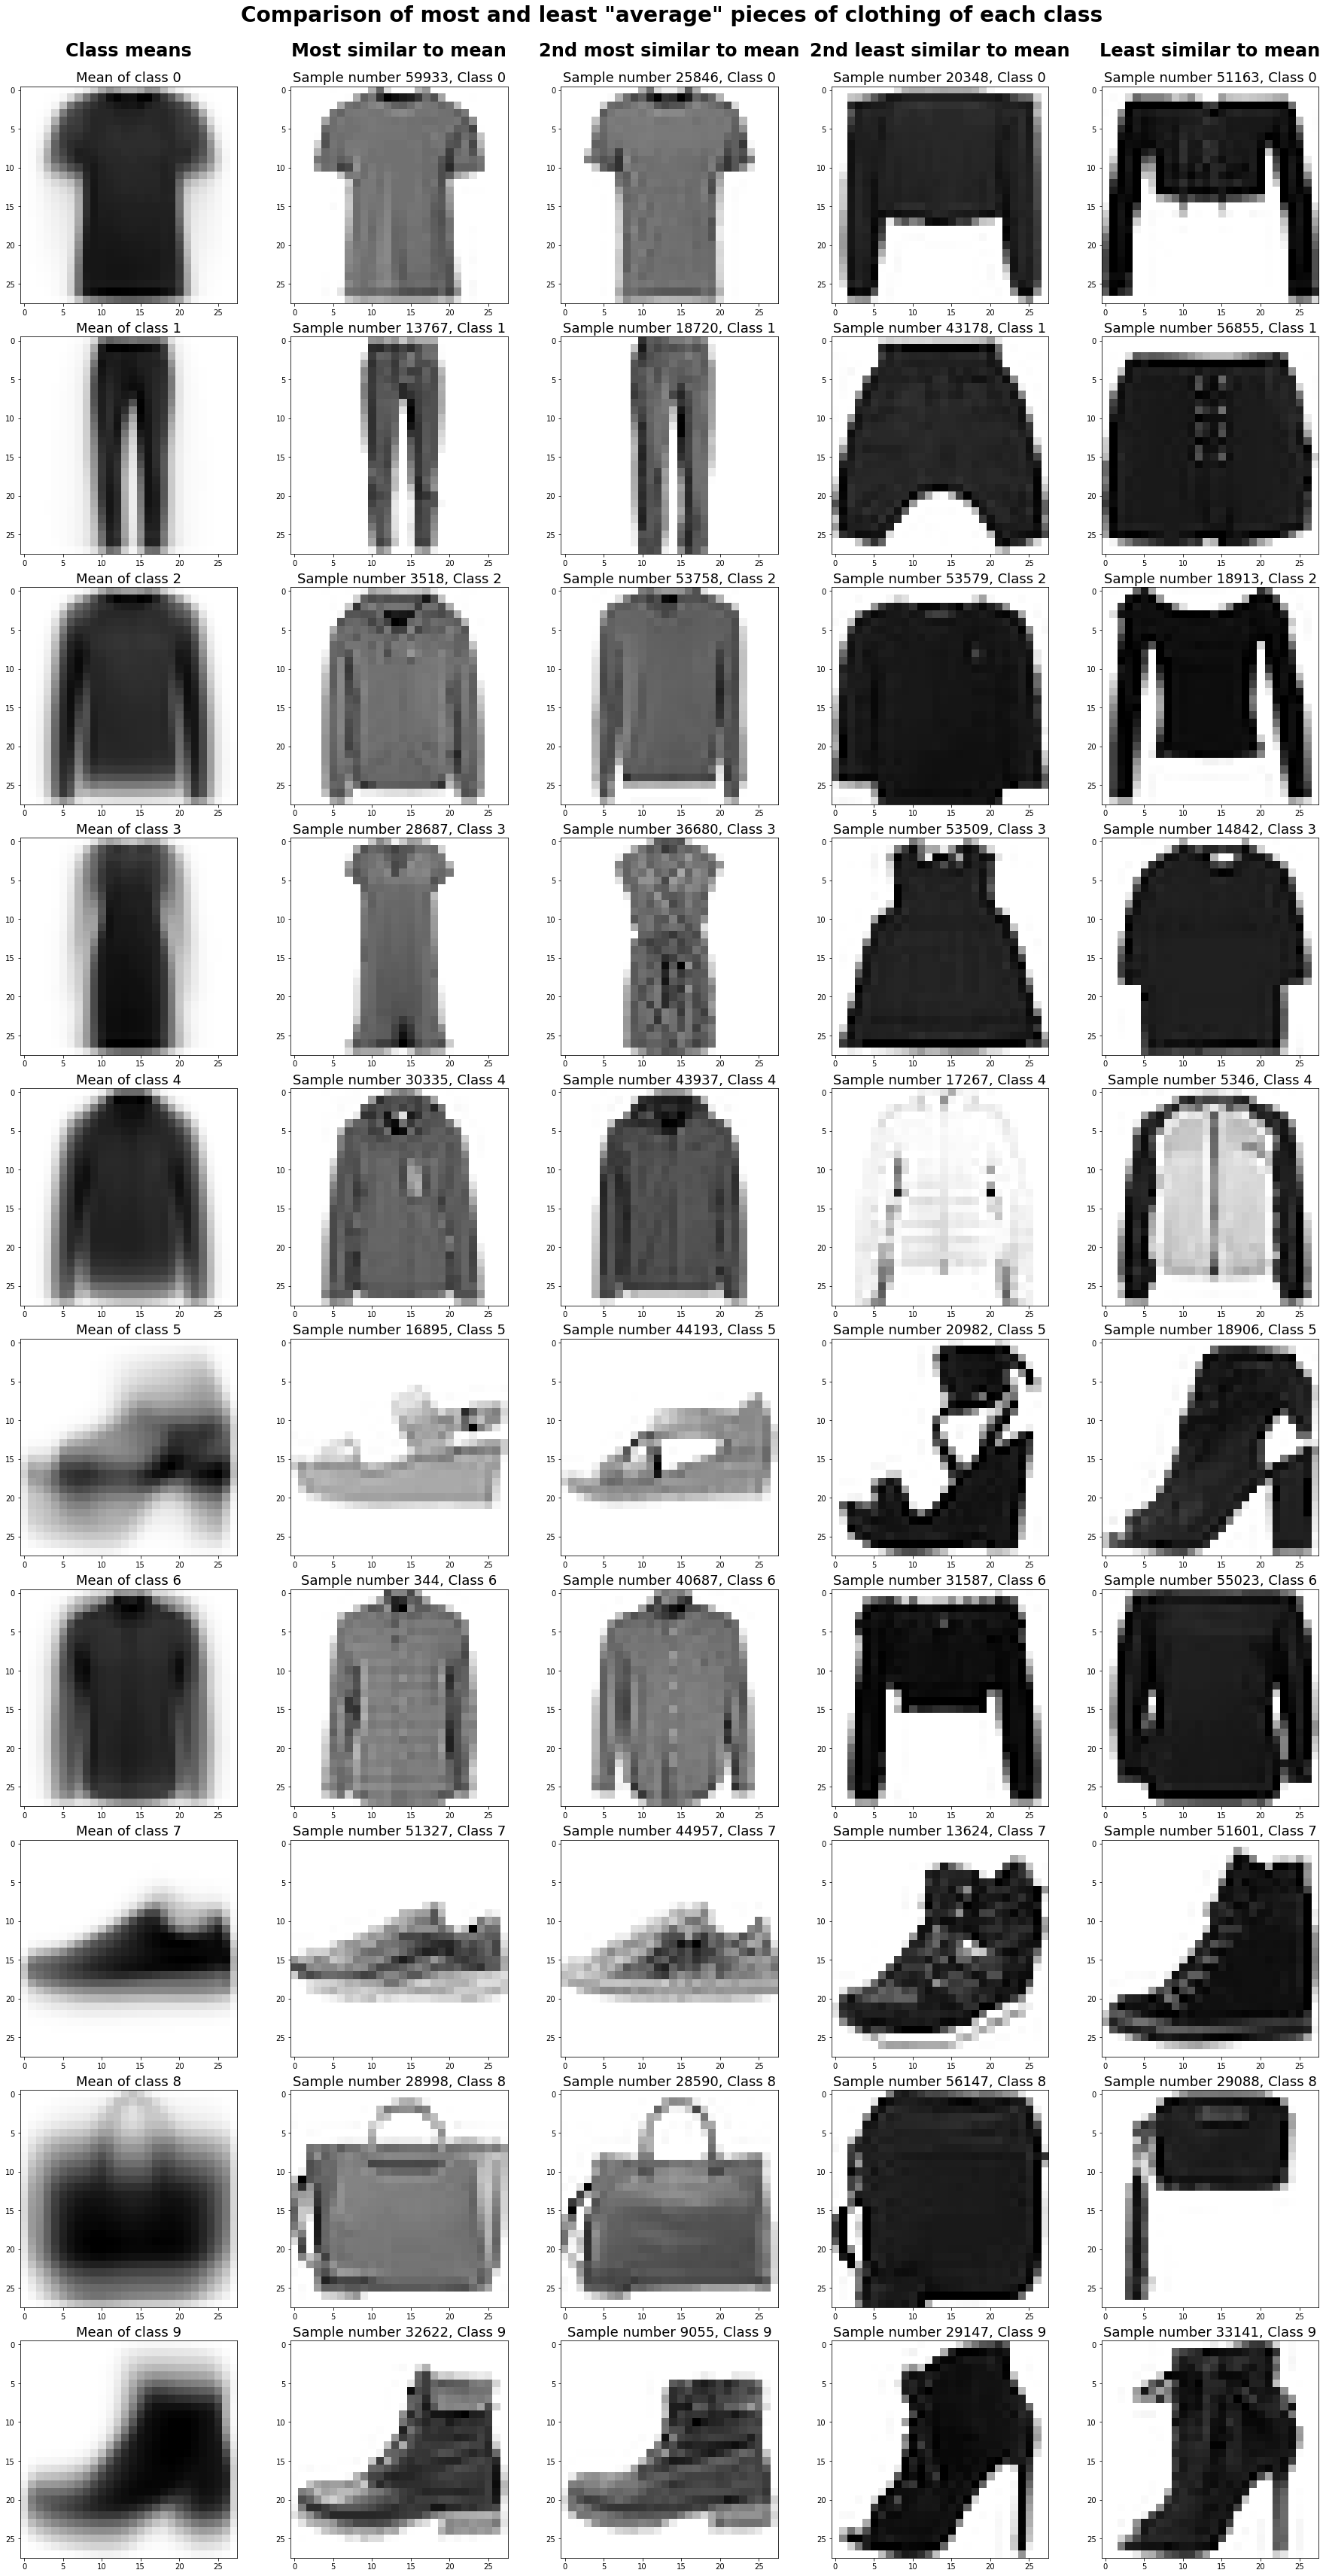

In [139]:
fig, ax = plt.subplots(nrows=10, ncols=5, figsize=(25,50))

st = fig.suptitle("Comparison of most and least \"average\" " 
                  "pieces of clothing of each class", fontsize=28, weight="bold")

cols = ["Class means", "Most similar to mean", "2nd most similar to mean", 
        "2nd least similar to mean", "Least similar to mean"]
pad = 40
for a, col in zip(ax[0], cols):
    a.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline', fontsize=24, weight="bold")

for label in range(10):
    for j in range(5):
        vis = grid[label][j].reshape(28, 28)
        ax[label][j].imshow(vis, cmap="gray_r")
        if j == 0:
            ax[label][j].set_title("Mean of class " + str(label), fontsize=18)
        else:
            ax[label][j].set_title("Sample number " + str(sample_nums[label, j]) + ", Class " + str(label), fontsize=18)
        
fig.tight_layout()

st.set_y(0.95)
fig.subplots_adjust(top=0.92)

plt.show()

In [146]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(Xtrn_nm)
ex_var = pca.explained_variance_

In [147]:
print(ex_var[0:5])
sum(ex_var)

[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]


68.21739795109501

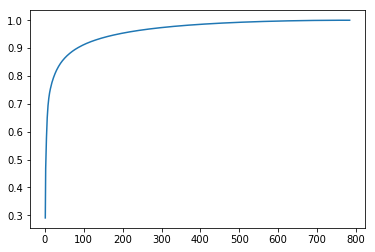

In [160]:
cum_ex_var = np.cumsum(pca.explained_variance_ratio_)
xs = [i for i in range(1, 785)]
fig = plt.plot(xs, cum_ex_var)
plt.show()